In [1]:
import json

import bz2
import regex
from tqdm import tqdm
from scipy import sparse

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
responses = []
with bz2.BZ2File('banki_responses (1).json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

201030it [00:35, 5630.40it/s]



Посмотрим на пример отзыва:

In [4]:
responses[99]

{'city': 'г. Саратов',
 'rating_not_checked': False,
 'title': 'Карта ко вкладу',
 'num_comments': 0,
 'bank_license': 'лицензия № 880',
 'author': 'ronnichka',
 'bank_name': 'Югра',
 'datetime': '2015-06-03 20:56:57',
 'text': 'Здравствуйте! Хотела написать, что мне месяц не выдают карту ко вкладу, ссылаясь на "нам же их из Самары везут" (на секундочку 5 часов езды от нашего города). Но! Прочитала, что людям 3,5 месяцев не выдают карту, и поняла, что у меня все хорошо, пока что. И подарок мне дали, и кулер в отделении есть. Так что я, конечно, готова ждать. Правда хотелось бы не очень долго.',
 'rating_grade': 3}

In [5]:
len(responses)

153499

In [333]:
df = pd.DataFrame(responses)

In [334]:
df.head()

,city,rating_not_checked,title,num_comments,bank_license,author,bank_name,datetime,text,rating_grade
0,г. Москва,False,Жалоба,0,лицензия № 2562,uhnov1,Бинбанк,2015-06-08 12:50:54,Добрый день! Я не являюсь клиентом банка и пор...,NaN
1,г. Новосибирск,False,Не могу пользоваться услугой Сбербанк он-лайн,0,лицензия № 1481,Foryou,Сбербанк России,2015-06-08 11:09:57,Доброго дня! Являюсь держателем зарплатной кар...,NaN
2,г. Москва,False,Двойное списание за один товар.,1,лицензия № 2562,Vladimir84,Бинбанк,2015-06-05 20:14:28,Здравствуйте! Дублирую свое заявление от 03.0...,NaN
3,г. Ставрополь,False,Меняют проценты комиссии не предупредив и не ...,2,лицензия № 1481,643609,Сбербанк России,2015-06-05 13:51:01,Добрый день!! Я открыл расчетный счет в СберБа...,NaN
4,г. Челябинск,False,Верните денежные средства за страховку,1,лицензия № 2766,anfisa-2003,ОТП Банк,2015-06-05 10:58:12,"04.03.2015 г. взяла кредит в вашем банке, заяв...",NaN


In [20]:
len(df[ pd.isnull(df['city'])].head())

5

In [21]:
df1 = df[pd.isnull(df['city']) == 0 ]

In [30]:
len(df[ pd.isnull(df['bank_name'])].head())

0

Часть 1. Анализ текстов

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
from nltk.tokenize import word_tokenize

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
from collections import Counter
corpus = [token for tweet in df1.city for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

288485


['г.',
 'Москва',
 'г.',
 'Новосибирск',
 'г.',
 'Москва',
 'г.',
 'Ставрополь',
 'г.',
 'Челябинск']

In [29]:
freq_dict = Counter(corpus)
freq_dict

Counter({'г.': 138574,
         'Москва': 56268,
         'Новосибирск': 2338,
         'Ставрополь': 709,
         'Челябинск': 1541,
         'Волгоград': 1036,
         'Пермь': 1182,
         'Ростов-на-Дону': 1926,
         'Воронеж': 1235,
         'Таганрог': 267,
         'Ростовская': 63,
         'обл': 753,
         'Санкт-Петербург': 14525,
         'Конаково': 13,
         'Мурманск': 442,
         'Волгодонск': 102,
         'Большеречье': 3,
         'Одинцово': 237,
         'Московская': 414,
         'Салават': 43,
         'Республика': 111,
         'Башкортостан': 37,
         'Краснодар': 1316,
         'Кострома': 163,
         'Нижний': 2261,
         'Новгород': 2273,
         'Орел': 238,
         'Саратов': 961,
         'Казань': 1470,
         'Реутов': 101,
         'Ульяновск': 516,
         'Красноярск': 1246,
         'Хабаровск': 701,
         'Магнитогорск': 400,
         'Челябинская': 56,
         'Фролово': 7,
         'Волгоградская': 34,
        

In [31]:
from collections import Counter
corpus = [token for tweet in df1.bank_name for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

282865


['Бинбанк',
 'Сбербанк',
 'России',
 'Бинбанк',
 'Сбербанк',
 'России',
 'ОТП',
 'Банк',
 'Гагаринский',
 'Сбербанк']

In [32]:
freq_dict = Counter(corpus)
freq_dict

Counter({'Бинбанк': 1404,
         'Сбербанк': 25521,
         'России': 25521,
         'ОТП': 3086,
         'Банк': 53849,
         'Гагаринский': 18,
         'Тинькофф': 5275,
         'Восточный': 3042,
         'Экспресс': 3045,
         'ВТБ': 7349,
         '24': 7307,
         'Альфа-Банк': 9059,
         'БИНБАНК': 1321,
         'кредитные': 1321,
         'карты': 1321,
         'МТС': 1785,
         'Совкомбанк': 905,
         'Россельхозбанк': 512,
         'Московский': 4186,
         'Кредитный': 2825,
         'МДМ': 740,
         'Хоум': 7337,
         'Кредит': 12335,
         'Бенифит-Банк': 115,
         'Уральский': 519,
         'Реконструкции': 517,
         'и': 523,
         'Развития': 572,
         'Русский': 7319,
         'Стандарт': 7317,
         'Лето': 501,
         'Петрокоммерц': 303,
         'Русфинанс': 645,
         'Киви': 1740,
         'Ханты-Мансийский': 1940,
         'банк': 2647,
         'Открытие': 2456,
         'Русславбанк': 710,
   

In [33]:
from collections import Counter
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
print(len(corpus))
corpus[:10]

36766261


['Добрый',
 'день',
 'Я',
 'не',
 'являюсь',
 'клиентом',
 'банка',
 'и',
 'поручителем',
 'по']

In [34]:
freq_dict = Counter(corpus)
freq_dict.most_common(10)

[('в', 1169557),
 ('и', 980761),
 ('не', 816419),
 ('на', 638715),
 ('что', 603171),
 ('я', 443478),
 ('с', 428021),
 ('по', 338743),
 ('мне', 293980),
 ('банка', 235176)]

In [35]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sasha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [36]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [37]:
noise = stopwords.words('russian') + list(punctuation)

In [38]:
from collections import Counter
corpus = [token for tweet in df.text for token in word_tokenize(tweet) if token not in noise]
print(len(corpus))
corpus[:10]

25349262


['Добрый',
 'день',
 'Я',
 'являюсь',
 'клиентом',
 'банка',
 'поручителем',
 'кредитному',
 'договору',
 'также']

In [43]:
freq_dict = Counter(corpus)
freq_dict.most_common(10)

[('банка', 235176),
 ('``', 220777),
 ("''", 215530),
 ('банк', 159569),
 ('это', 158915),
 ('В', 152959),
 ('Я', 130418),
 ('деньги', 121777),
 ('...', 113647),
 ('карту', 101181)]

In [50]:
corpus[10]

'являюсь'

In [40]:
!pip install pymorphy2

In [41]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

In [44]:
noise = stopwords.words('russian') + list(punctuation) + ['``', '...', "''", '«']

In [52]:
from collections import Counter
corpus = [pymorphy2_analyzer.parse(token)[0].normal_form for tweet in df.text for token in word_tokenize(tweet) if token not in noise]
#" ".join([m.parse(w)[0].normal_form for w in text.lower().split()])
#for wor in corpus:
#    wor = pymorphy2_analyzer.parse(wor)[0].normal_form
print(len(corpus))
corpus[:10]

24741819


['добрый',
 'день',
 'я',
 'являться',
 'клиент',
 'банк',
 'поручитель',
 'кредитный',
 'договор',
 'также']

In [53]:
freq_dict = Counter(corpus)
freq_dict.most_common(10)

[('банк', 624274),
 ('карта', 331816),
 ('я', 201556),
 ('это', 200500),
 ('деньга', 178337),
 ('мой', 174129),
 ('день', 172634),
 ('в', 156374),
 ('кредит', 154863),
 ('который', 148990)]

In [54]:
from collections import Counter
corpus = [pymorphy2_analyzer.parse(token)[0].normal_form for tweet in df.text for token in word_tokenize(tweet) if token not in noise if pymorphy2_analyzer.parse(token)[0].tag.POS == 'NOUN'  ]
#" ".join([m.parse(w)[0].normal_form for w in text.lower().split()])
#for wor in corpus:
#    wor = pymorphy2_analyzer.parse(wor)[0].normal_form
print(len(corpus))
corpus[:10]

10439854


['день',
 'клиент',
 'банк',
 'поручитель',
 'договор',
 'лицо',
 'отношение',
 'банк',
 'повод',
 'урегулирование']

In [55]:
freq_dict = Counter(corpus)
freq_dict.most_common(10)

[('банк', 624274),
 ('карта', 331816),
 ('деньга', 178337),
 ('день', 172634),
 ('кредит', 154863),
 ('отделение', 143616),
 ('счёт', 140509),
 ('сотрудник', 133662),
 ('клиент', 132908),
 ('сумма', 110914)]

In [56]:
from collections import Counter
corpus1 = [token for tweet in df.text for token in word_tokenize(tweet) if token not in punctuation]
corpus1[:10]

['Добрый',
 'день',
 'Я',
 'не',
 'являюсь',
 'клиентом',
 'банка',
 'и',
 'поручителем',
 'по']

In [57]:
freq_dict1 = Counter(corpus1)


Кривая Ципфа

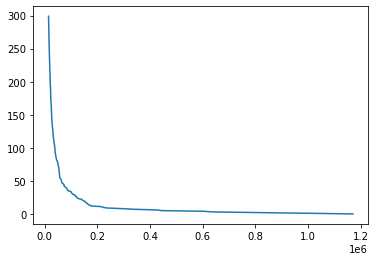

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

freqs = list(freq_dict1.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

In [ ]:
Кривая Хипса

In [77]:
from tqdm import tqdm

cnt = Counter()
n_words = []
n_tokens = []
tokens = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = word_tokenize(row['text'])
    cnt.update([token for token in tokens if token not in punctuation])
    n_words.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))

100%|██████████████████████████████████████████████████████████████████████████| 153499/153499 [47:59<00:00, 53.30it/s]


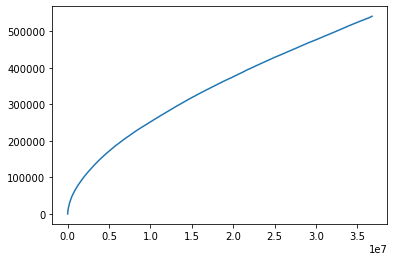

In [78]:
fig, ax = plt.subplots()
ax.plot(np.array(n_tokens).astype(float), n_words)
plt.show()

In [82]:
from collections import deque
wo = deque(corpus)
print(wo.count('сотрудник'))
print(wo.count('клиент'))

133662
132908


In [83]:
print(wo.count('мошенничество'))
print(wo.count('доверие'))

3228
2098


In [106]:
df2 = df[df.rating_grade.isin([1.0])][['text', 'rating_grade']]

In [107]:
df2.head()

,text,rating_grade
19,Открыт вклад и счет в USD. Плюс к этому есть з...,1.0
33,Доброго времени! Вчера мне поступило смс-уведо...,1.0
76,"05.06.2015г. около 15 часов, пришел в указанны...",1.0
85,Для оплаты коммунальных платежей пользуюсь пла...,1.0
94,В апреле этого года пришла в отделение сбербан...,1.0


In [108]:
df2.rating_grade.value_counts()

1.0    47387
Name: rating_grade, dtype: int64

In [109]:
df3 = df[df.rating_grade.isin([5.0])][['text', 'rating_grade']]

In [110]:
df3.head()

,text,rating_grade
98,Досрочно закрывали вклады перед отпуском. Жена...,5.0
122,"Хотел открыть вклад ""Доходный+"" под 19% год , ...",5.0
157,"Вчера, 3 июня, просидев в очереди более 3-х ча...",5.0
259,Сегодня открывал вклад в этом банке. Очередь б...,5.0
266,Моя история получения кредита в Ренессанс Кред...,5.0


In [111]:
df3.rating_grade.value_counts()

5.0    14713
Name: rating_grade, dtype: int64

In [112]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [119]:
vec = TfidfVectorizer()
bow = vec.fit_transform(df2.text)
bow2 = vec.transform(df2.text)

In [167]:
list1=np.column_stack([bow2.tocoo().data, bow2.tocoo().col])

In [172]:
list2=sorted(list1, key=lambda x: [x[0], x[1]], reverse=True)

In [185]:
inv_vec = dict(zip(vec.vocabulary_.values(), vec.vocabulary_.keys()))

In [195]:
ntop = 50
for i in range(0, ntop):
    print(inv_vec.get(list2[i][1]))

25d0
юб
15сек
бпф
ргс
d0
con
ubank
мб
ms
хх
барклайс
d0
птс
d0
paypass
дев
кбк
тыханская
74957395555
d0
клиент
юкб
igor
дир
ап
рцб
велозаводская
нпф
яд
гость
рублев
чдп
слиток
машинцева
казалось
hsbc
дорабатывал
хх
гиб
эллипс
эцп
проводят
ла
тирэ
предоплаченной
gorodskoi
трансаеро
ицп
мб


In [197]:
vec = TfidfVectorizer()
bow = vec.fit_transform(df3.text)
bow2 = vec.transform(df3.text)

In [198]:
list1=np.column_stack([bow2.tocoo().data, bow2.tocoo().col])

In [199]:
list2=sorted(list1, key=lambda x: [x[0], x[1]], reverse=True)

In [200]:
inv_vec = dict(zip(vec.vocabulary_.values(), vec.vocabulary_.keys()))

In [201]:
ntop = 50
for i in range(0, ntop):
    print(inv_vec.get(list2[i][1]))

канаде
пд
08
08
космонавтов
дырявые
неудобного
солнечногорск
appstore
ikea
пскб
вэб
01
джиргал
гарантий
марюс
овч
05
регулярная
инна
сити
рб
рба
илаха
qiwi
ммб
pin
меге
семинар
бла
airbonus
город
deltacredit
imb
стк
командой
агропромкредит
псб
райф
сбб
кки
таганский
першинг
билайн
тьфу
руссфинанс
положу
опм
номос
ке


In [210]:
vec = TfidfVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(df2.text)
bow2 = vec.transform(df2.text)

In [211]:
list1=np.column_stack([bow2.tocoo().data, bow2.tocoo().col])

In [212]:
list2=sorted(list1, key=lambda x: [x[0], x[1]], reverse=True)

In [213]:
inv_vec = dict(zip(vec.vocabulary_.values(), vec.vocabulary_.keys()))

In [214]:
ntop = 50
for i in range(0, ntop):
    print(inv_vec.get(list2[i][1]))

тыханская юлия
то казалось
31 01
оао отп
visa почти
банка рублев
оао отп
персональных данных
ао метробанк
сергей александрович
наличные безналичные
делают карту
оператор 05
зо ва
алёна зо
вероника фомичёва
14 платежное
00 rur
ольга чук
отп банк
gorodskoi ru
предоплаченной карты
apr 14
05 apr
татьяна майорова
10 2011
659 83
000000 плата
8909 071
сбербанк россии
отп банк
нпф сбербанк
исполнительного документа
ва марьяна
01 2015г
сбербанка 1738
00 мин
08 2100
могли прислать
овердрафт rur
ла ла
17500 руб
зао москомприватбанк
12 2007
ситуация ая
по paypass
03 2014
павел максачук
oplata kartoj
по жалобам


In [215]:
vec = TfidfVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(df3.text)
bow2 = vec.transform(df3.text)

In [216]:
list1=np.column_stack([bow2.tocoo().data, bow2.tocoo().col])

In [217]:
list2=sorted(list1, key=lambda x: [x[0], x[1]], reverse=True)

In [218]:
inv_vec = dict(zip(vec.vocabulary_.values(), vec.vocabulary_.keys()))

In [219]:
ntop = 50
for i in range(0, ntop):
    print(inv_vec.get(list2[i][1]))

mastercard сделали
получил 150
12 05
отвечали оперативно
08 08
08 2010
екатерина андреевна
08 08
хорошо имею
космонавтов никаких
филиала меге
000 без
psb retail
красиво успехов
корректно красиво
ул космонавтов
профсоюзной очень
меге на
тверской очередях
стоял обслуживание
июня 2007
работники хорошие
вкладчиком несколько
четко удобно
11 2010
пользуюсь 2003
им командой
ке банка
экспресс все
сижу германии
германии кредитками
кредитку выдали
услугами филиала
отзывы делал
дону вежливое
вежливые работники
рекомендовали мдм
доволен идут
филиал собина
обещают рекомендую
как обещают
замечаний все
автомобиль никаких
12 2013г
доволен им
кредитками альфа
быстро получил
06 10
райф это
вклад ростове


Часть 2. Тематическое моделирование

In [222]:
from collections import Counter
corpus_title = [pymorphy2_analyzer.parse(token)[0].normal_form for tweet in df.title for token in word_tokenize(tweet) if token not in noise if pymorphy2_analyzer.parse(token)[0].tag.POS == 'NOUN'  ]
print(len(corpus_title))
corpus[:10]

321916


['день',
 'клиент',
 'банк',
 'поручитель',
 'договор',
 'лицо',
 'отношение',
 'банк',
 'повод',
 'урегулирование']

In [223]:
freq_dict = Counter(corpus_title)
freq_dict.most_common(10)

[('банк', 24425),
 ('карта', 16131),
 ('деньга', 11818),
 ('кредит', 8021),
 ('клиент', 7171),
 ('банкомат', 5892),
 ('сотрудник', 5726),
 ('обслуживание', 5463),
 ('сбербанк', 5441),
 ('вклад', 4988)]

In [231]:
vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize, stop_words=noise)
bow = vec.fit_transform(df.title)
bow2 = vec.transform(df.title)

In [236]:
a1=vec.vocabulary_.get('карта')

In [237]:
print(a1)

15561


In [238]:
list3=bow2.tocoo().row
list4=bow2.tocoo().col

In [250]:
list5 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a1:
        list5.append([df.loc[(list3[i],'text')], 'карта'])

In [253]:
print(list5[0])

['В продолжение истории, которая тянется с марта 2015г http://www.banki.ru/services/responses/bank/response/7917136/ . Сбербанк выдал мне бумажку, в которой написано, что все исправлено, чужие кредиты на мне больше не висят, информация в БКИ обновлена... письмо от 8 мая 15г Но, решила взять кредит в июне, и какого же мое удивление, когда мне звонят проверяющие по кредиту и говорят, что на мне ипотека и кредитная карта... Уважаемые, это как понимать? Т.е. в БКИ информация не обновлялась?', 'карта']


In [254]:
df2 = pd.DataFrame(list5)

In [255]:
df2.head()

,0,1
0,"В продолжение истории, которая тянется с марта...",карта
1,"Здравствуйте! Хотела написать, что мне месяц н...",карта
2,"Ну что ж, понимаю, всем банкам было не очень п...",карта
3,"Сегодня, 29.05.15 в московском отделении мне о...",карта
4,"Когда-то у меня была их кредитная карта, навяз...",карта


In [256]:
a2=vec.vocabulary_.get('кредит')

In [257]:
list6 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a2:
        list6.append([df.loc[(list3[i],'text')], 'кредит'])

In [260]:
a3=vec.vocabulary_.get('банкомат')

In [261]:
list7 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a3:
        list7.append([df.loc[(list3[i],'text')], 'банкомат'])

In [262]:
a4=vec.vocabulary_.get('вклад')

In [263]:
list8 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a4:
        list8.append([df.loc[(list3[i],'text')], 'вклад'])

In [274]:
df2 = pd.DataFrame(list5 + list6 + list7 + list8, columns=['text', 'tags'])

In [275]:
df2

,text,tags
0,"В продолжение истории, которая тянется с марта...",карта
1,"Здравствуйте! Хотела написать, что мне месяц н...",карта
2,"Ну что ж, понимаю, всем банкам было не очень п...",карта
3,"Сегодня, 29.05.15 в московском отделении мне о...",карта
4,"Когда-то у меня была их кредитная карта, навяз...",карта
...,...,...
11916,"Вроде пока все ок, вклад оформили быстро, фили...",вклад
11917,Хм... Тоже как раз вчера открыл депозит в фили...,вклад
11918,"Неделю назад открыл депозит ""Наша Победа"" на 1...",вклад
11919,"Сегодня открыл вклад, отделение Алексеевское. ...",вклад


In [276]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim import similarities
from gensim.models import lsimodel

In [277]:
texts = [text.split() for text in df2.text]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [278]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [279]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

CPU times: total: 22.7 s
Wall time: 9.78 s


In [280]:
lsi.show_topics(10)

[(0,
  '0.121*"-" + 0.117*"я" + 0.112*"мне" + 0.095*"деньги" + 0.087*"банкомат" + 0.087*"меня" + 0.086*"Я" + 0.083*"кредит" + 0.081*"о" + 0.080*"у"'),
 (1,
  '-0.302*"банкомат" + -0.184*"деньги" + -0.172*"выдал" + -0.138*"Банкомат" + 0.136*"кредит" + -0.119*"чек" + -0.107*"000" + -0.104*"счет" + -0.096*"заявление" + -0.096*"банкомате"'),
 (2,
  '0.273*"вклад" + -0.227*"кредит" + 0.155*"-" + 0.142*"вклада" + -0.141*"кредита" + 0.129*"открыть" + -0.101*"руб." + 0.093*"деньги" + -0.092*"года" + -0.092*"звонки"'),
 (3,
  '-0.396*"вклад" + -0.302*"вклада" + -0.132*"открыть" + -0.104*"средства" + -0.099*"средств" + -0.097*"денежных" + -0.096*"г." + -0.093*"денежные" + -0.091*"договора" + 0.090*"кредит"'),
 (4,
  '0.351*"карта" + 0.285*"карты" + 0.209*"карту" + -0.185*"кредит" + -0.128*"мы" + -0.123*"нам" + 0.122*"карты." + -0.114*"000" + 0.114*"ее" + 0.109*"карты,"'),
 (5,
  '0.217*"руб." + 0.205*"000" + -0.140*"звонки" + -0.130*"номер" + 0.117*"карты" + 0.107*"карте" + 0.106*"рублей" + 0.10

Создал набор данных в title которых фигурируют слова 'карта', 'кредит', 'банкомат', 'вклад' 

  (4,
  '0.351*"карта" + 0.285*"карты" + 0.209*"карту" + -0.185*"кредит" + -0.128*"мы" + -0.123*"нам" + 0.122*"карты." + -0.114*"000" + 0.114*"ее" + 0.109*"карты,"'),
  
  Интепритировать довольно сложно, наверное предлагают открыть кредитную карту.
  

In [281]:
a5=vec.vocabulary_.get('сбербанк')

In [282]:
list9 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a5:
        list9.append([df.loc[(list3[i],'text')], 'сбербанк'])

In [289]:
a6=vec.vocabulary_.get('втб')

In [290]:
list10 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a6:
        list10.append([df.loc[(list3[i],'text')], 'втб'])

In [291]:
a7=vec.vocabulary_.get('тинькофф')

In [292]:
list11 = []
for i in range(len(bow2.tocoo().col)):
    if list4[i]==a7:
        list11.append([df.loc[(list3[i],'text')], 'тинькофф'])

In [297]:
df3 = pd.DataFrame(list9 + list10 + list11, columns=['text', 'tags'])

In [298]:
df3

,text,tags
0,Доброго дня! Являюсь держателем зарплатной кар...,сбербанк
1,Хотел взять потребительский кредит 120 т.р. на...,сбербанк
2,10 апреля 2015 года около 8 утра терминал по а...,сбербанк
3,21.05.2015 зашел в отделение Сбербанка на ул. ...,сбербанк
4,Здравствуйте! Сегодня проверил историю операци...,сбербанк
...,...,...
3374,Здравствуйте! Я пользуюсь услугами банка около...,тинькофф
3375,"Описываю ситуацию. У меня был пропущен платеж,...",тинькофф
3376,"Банк устраивал до того момента, как повысил ст...",тинькофф
3377,"Прочитала отзывы о Банке ТКС. Согласна, очень ...",тинькофф


In [299]:
texts = [text.split() for text in df3.text]
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [300]:
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [301]:
%%time
lsi = lsimodel.LsiModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=30)

CPU times: total: 10.5 s
Wall time: 3.58 s


In [302]:
lsi.show_topics(10)

[(0,
  '0.109*"-" + 0.107*"мне" + 0.107*"я" + 0.089*"деньги" + 0.082*"меня" + 0.079*"Я" + 0.078*"карты" + 0.078*"о" + 0.075*"заявление" + 0.075*"все"'),
 (1,
  '0.210*"удалить" + 0.206*"персональных" + 0.203*"обработку" + 0.193*"адресованные" + 0.191*"направлена" + 0.188*"требую" + 0.186*"звонки" + 0.185*"базы" + 0.178*"поступают" + 0.177*"проделанных"'),
 (2,
  '-0.177*"денежных" + -0.148*"средств" + -0.148*"ОАО" + -0.134*"г." + 0.126*"-" + -0.117*"денежные" + -0.115*"№" + -0.111*"рассмотрения" + -0.111*"средства" + -0.110*"заявление"'),
 (3,
  '-0.349*"ВТБ" + -0.208*"24" + -0.161*"кредит" + -0.152*"мы" + -0.136*"нам" + 0.126*"Сбербанк" + 0.118*"онлайн" + 0.113*"номер" + -0.107*"кредита" + 0.098*"сбербанк"'),
 (4,
  '0.189*"банкомат" + -0.178*"ОАО" + 0.118*"рассмотрения" + 0.118*"деньги" + -0.116*"«Сбербанк" + -0.114*""Сбербанк" + 0.105*"000" + 0.105*"выдал" + 0.093*"рабочих" + 0.091*"дней."'),
 (5,
  '-0.223*"ВТБ" + -0.178*"банкомат" + -0.154*"деньги" + -0.119*"руб." + -0.115*"24" + 

## Классификация текстов

In [392]:
df4 = df[df.rating_grade.isin([1.0, 5.0])][['text', 'rating_grade']]

In [393]:
df4

,text,rating_grade
19,Открыт вклад и счет в USD. Плюс к этому есть з...,1.0
33,Доброго времени! Вчера мне поступило смс-уведо...,1.0
76,"05.06.2015г. около 15 часов, пришел в указанны...",1.0
85,Для оплаты коммунальных платежей пользуюсь пла...,1.0
94,В апреле этого года пришла в отделение сбербан...,1.0
...,...,...
153493,Оформил в банке кредитную карту в январе 2004 ...,1.0
153494,"Слишком большой банк, не всегда учитывает нашу...",5.0
153496,Уважаемое руководство банка «ОВК»! Я проживаю ...,1.0
153497,Пробовала 10.04.05 оформить товар в кредит в А...,1.0


In [394]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_extraction.text import CountVectorizer
from pandas.core.frame import Series

In [398]:
mystopwords = stopwords.words('russian') + [
    'это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д',
    'который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой'
]
ru_words = re.compile("[А-Яа-я]+")


def words_only(text):
    return " ".join(ru_words.findall(text))


def lemmatize(text):
    try:
        return  " ".join([pymorphy2_analyzer.parse(w)[0].normal_form for w in text.lower().split()])
    except:
        return " "


def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

    
def preprocess(text):
    return   remove_stopwords(lemmatize(words_only(text.lower())))

In [400]:
df4.text = df4.text.astype('str').apply(preprocess)

In [401]:
df4

,text,rating_grade
19,открыть вклад сч плюс зарплатный карта рубль с...,1.0
33,добрый время вчера поступить смс уведомление б...,1.0
76,г около час прийти указанный офис намерение по...,1.0
85,оплата коммунальный плата пользоваться пластик...,1.0
94,апрель год прийти отделение сбербанк г чапаевс...,1.0
...,...,...
153493,оформить банк кредитный карта январь г первый ...,1.0
153494,слишком большой банк учитывать специфика проду...,5.0
153496,уважаемый руководство банк овк проживать г ива...,1.0
153497,пробовать оформить товар кредит альфа банк ком...,1.0


In [402]:
x_train, x_test, y_train, y_test = train_test_split(df4.text, df4.rating_grade)

In [404]:
from sklearn.metrics import *

In [405]:
vec = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Sasha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.99      0.96      0.98     12254
         5.0       0.87      0.97      0.92      3271

    accuracy                           0.96     15525
   macro avg       0.93      0.97      0.95     15525
weighted avg       0.97      0.96      0.96     15525



In [406]:
vec = TfidfVectorizer(ngram_range=(2, 2), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.90      0.94     13215
         5.0       0.62      0.98      0.76      2310

    accuracy                           0.91     15525
   macro avg       0.81      0.94      0.85     15525
weighted avg       0.94      0.91      0.92     15525



In [407]:
vec = TfidfVectorizer(ngram_range=(3, 3), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       1.00      0.79      0.88     15041
         5.0       0.13      0.98      0.23       484

    accuracy                           0.80     15525
   macro avg       0.56      0.89      0.56     15525
weighted avg       0.97      0.80      0.86     15525



In [408]:
vec = TfidfVectorizer(analyzer='char', ngram_range=(1, 1)) 
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Sasha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.97      0.81      0.88     14300
         5.0       0.24      0.71      0.36      1225

    accuracy                           0.80     15525
   macro avg       0.60      0.76      0.62     15525
weighted avg       0.91      0.80      0.84     15525



In [409]:
vec = TfidfVectorizer(analyzer='char', ngram_range=(2, 2)) 
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Sasha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.98      0.93      0.95     12561
         5.0       0.74      0.91      0.82      2964

    accuracy                           0.92     15525
   macro avg       0.86      0.92      0.88     15525
weighted avg       0.93      0.92      0.93     15525



In [410]:
vec = TfidfVectorizer(analyzer='char', ngram_range=(3, 3)) 
bow = vec.fit_transform(x_train)
clf = LogisticRegression(random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(vec.transform(x_test))
print(classification_report(pred, y_test))

C:\Users\Sasha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         1.0       0.99      0.96      0.97     12273
         5.0       0.85      0.95      0.90      3252

    accuracy                           0.96     15525
   macro avg       0.92      0.95      0.94     15525
weighted avg       0.96      0.96      0.96     15525



In [416]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD

clf = Pipeline([ 
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('tm', TruncatedSVD(n_components=2, random_state=0)), 
    ('clf', RandomForestClassifier())
])

clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       0.91      0.78      0.84     13750
         5.0       0.18      0.37      0.24      1775

    accuracy                           0.74     15525
   macro avg       0.54      0.58      0.54     15525
weighted avg       0.82      0.74      0.77     15525



In [417]:
from sklearn.decomposition import LatentDirichletAllocation

clf = Pipeline([ 
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()), 
    ('tda', LatentDirichletAllocation(n_components=2)), 
    ('clf', RandomForestClassifier())
])

clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

         1.0       0.85      0.83      0.84     12136
         5.0       0.45      0.48      0.46      3389

    accuracy                           0.76     15525
   macro avg       0.65      0.66      0.65     15525
weighted avg       0.76      0.76      0.76     15525

